# K Vecinos más cercanos con Python

¡Le dieron un conjunto de datos clasificados de una compañía! Han ocultado los nombres de las columnas de características, pero le han proporcionado los datos y las clases de destino.

Intentaremos usar KNN para crear un modelo que prediga directamente una clase para un nuevo punto de datos basado en las características.

¡Comencemos!

## Importación de librerias



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obtener los datos

Establecer index_col=0 para usar la primera columna como índice.

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
df['TARGET CLASS'].unique()

array([1, 0], dtype=int64)

In [6]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


## Estandarizar las variables

Debido a que el clasificador KNN predice la clase de una observación de prueba dada a través de la identificación de las observaciones que están más cerca de ella, la escala de las variables es importante. Cualquier variable que tenga una gran escala tendrá un efecto mucho mayor en la distancia entre las observaciones que las variables que están en una escala pequeña, y por lo tanto en el clasificador KNN.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [10]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## División en conjunto de entrenamiento y prueba

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=100)

## Uso de KNN (K vecinos más cercanos)

Recuerde que estamos tratando de encontrar un modelo para predecir si algo es TARGET CLASS o no. Comenzaremos con k = 1.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = knn.predict(X_test)

## Predicciones y Evaluaciones

¡Evaluemos nuestro modelo KNN!

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,pred))

[[146  16]
 [  7 131]]


In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       162
           1       0.89      0.95      0.92       138

    accuracy                           0.92       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300



## Elección del valor de K

Avancemos y usemos el método del codo para elegir un buen valor de K:

In [21]:
#Forma en la que se calcula el error
pred=[0,1,0,1,0]
real=[0,1,0,1,1]
c=np.mean(np.array(pred) != np.array(real))
print(c)

0.2


In [22]:
tasa_error = []

# Tomará algún tiempo
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasa de Error')

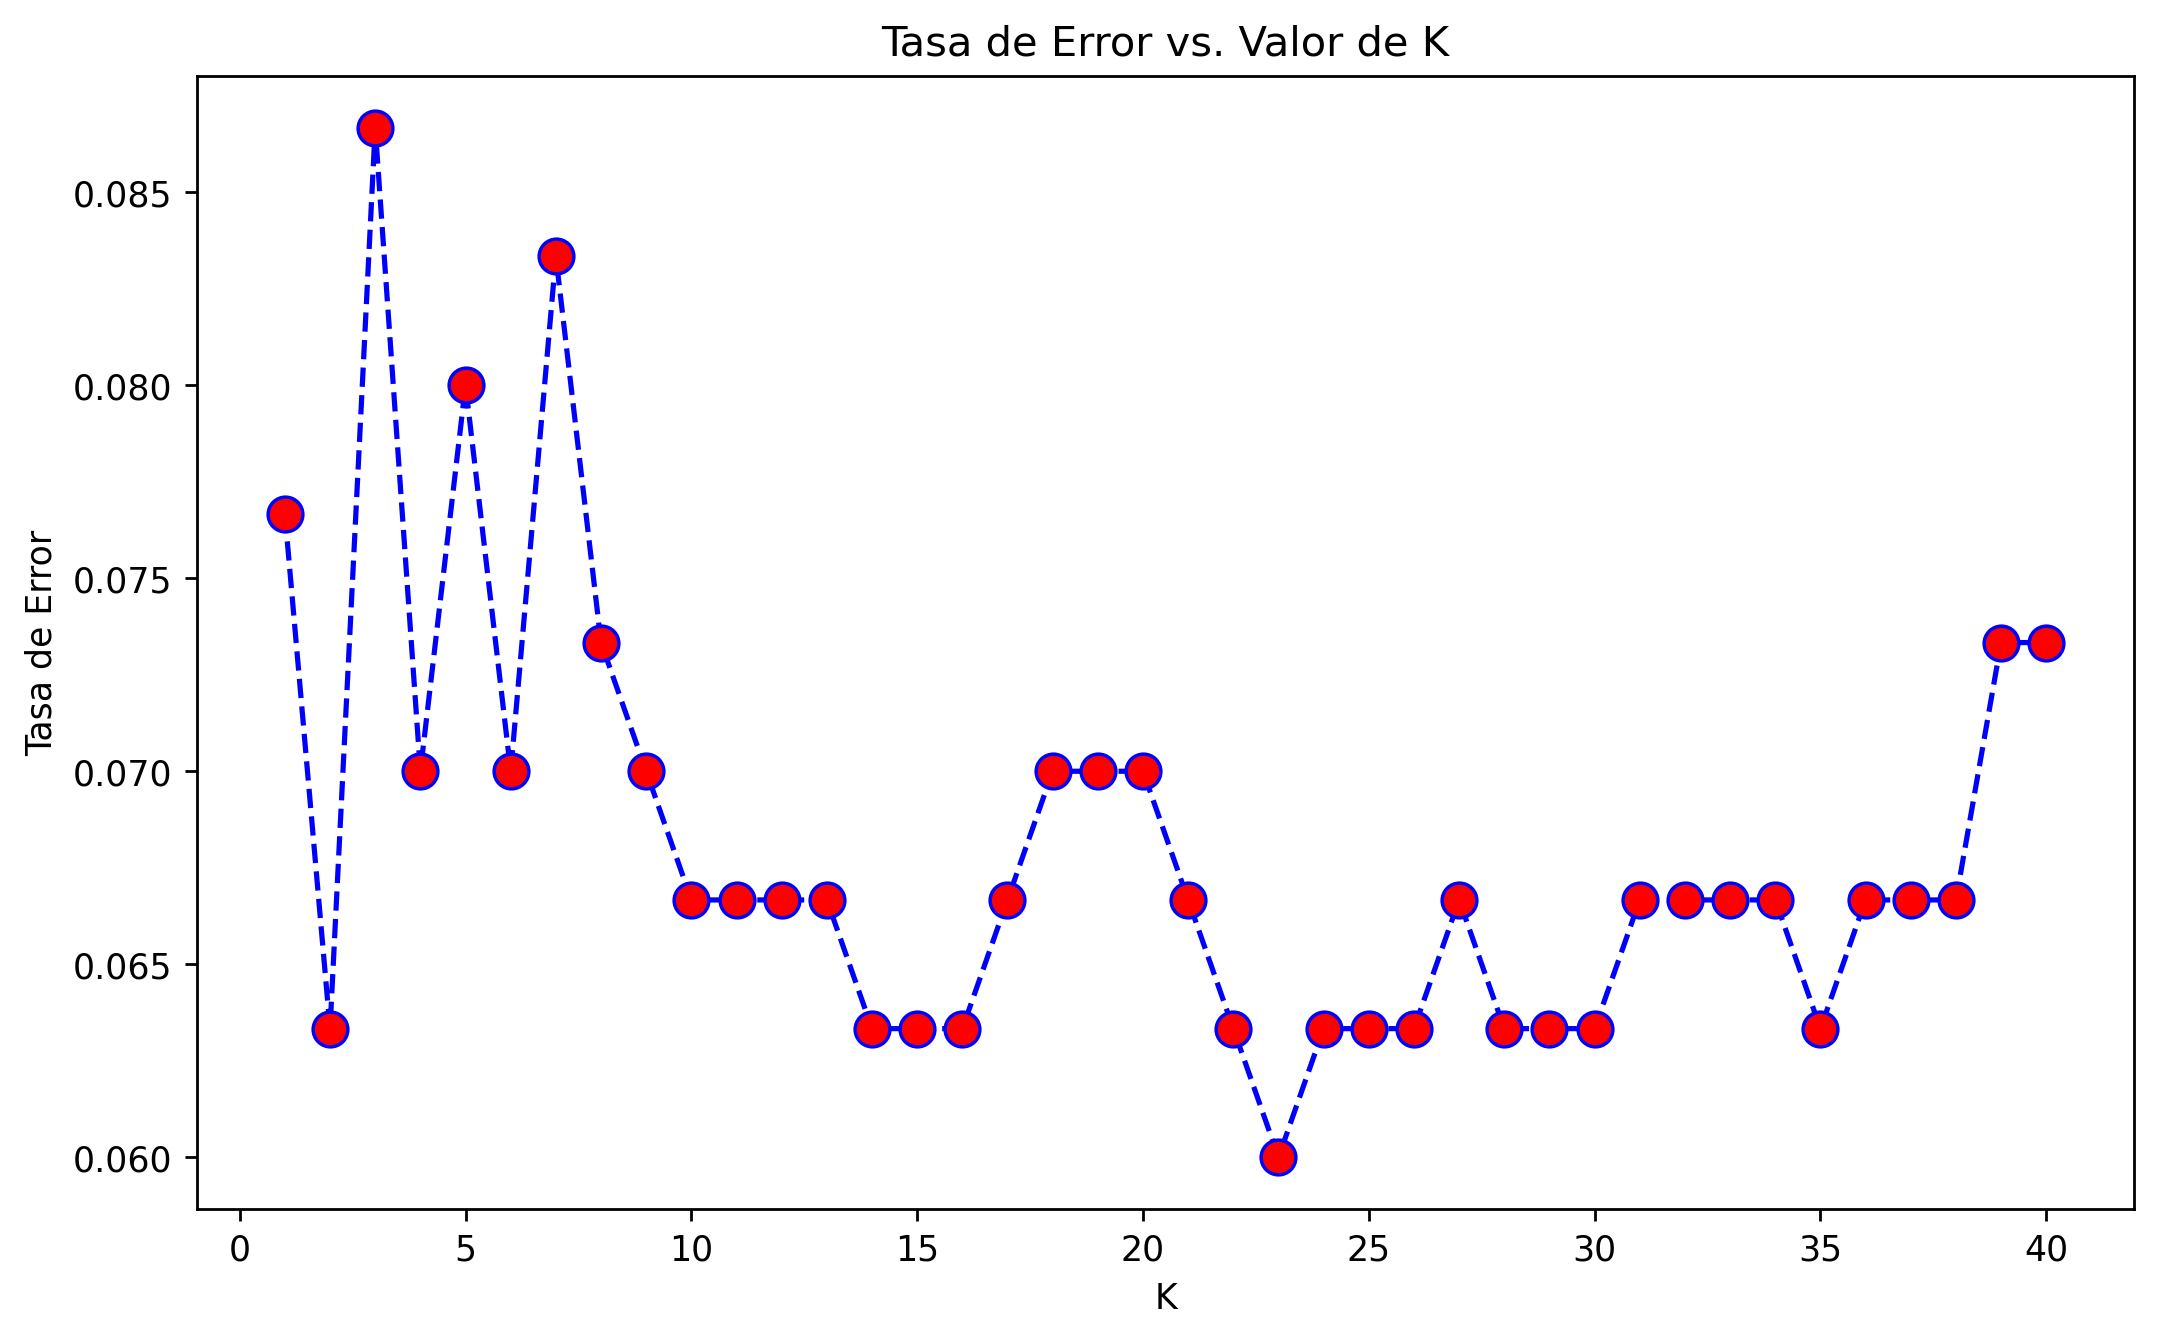

In [23]:
plt.figure(figsize=(10,6),dpi=250)
plt.plot(range(1,41),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

Aquí podemos ver que después de aplicar K> 23, la tasa de error tiende a rondar los 0.06-0.05. Reentrenemos el modelo con este dato y verifiquemos el informe de clasificación.

In [24]:
# PRIMERO UNA COMPARACIÓN RÁPIDA CON EL K=1 ORIGINAL
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=1


[[146  16]
 [  7 131]]


              precision    recall  f1-score   support

           0       0.95      0.90      0.93       162
           1       0.89      0.95      0.92       138

    accuracy                           0.92       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300



In [25]:
# AHORA CON K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=23


[[148  14]
 [  4 134]]


              precision    recall  f1-score   support

           0       0.97      0.91      0.94       162
           1       0.91      0.97      0.94       138

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



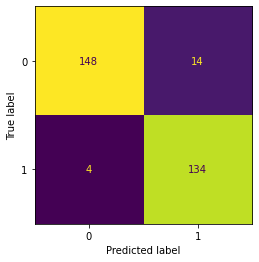

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,colorbar=False)

# Evaluación con Curva ROC y Curva Precision-Recall

In [27]:
from sklearn.metrics import plot_roc_curve

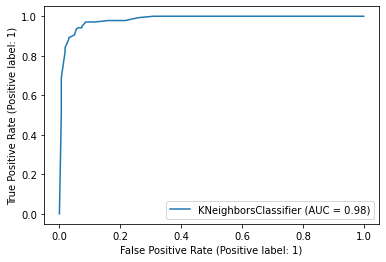

In [28]:
plot_roc_curve(knn,X_test,y_test)

In [29]:
from sklearn.metrics import plot_precision_recall_curve

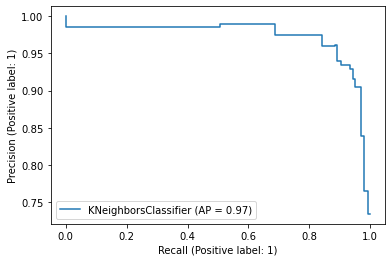

In [30]:
plot_precision_recall_curve(knn,X_test,y_test)

# Buen Trabajo!

¡Podemos mejorar más el rendimiento de nuestro modelo al encontrar un mejor valor de K!